# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.<br>
The numbering of the algorithms, tables and page refer to the book.

## Chapter 14: Least squares problem

### Algorithm 14.1: Gauss-Newton

Solve $\min_x f(x)=\frac{1}{2} g(x)^T g(x)$ using $g(x)$ and $\nabla g(x)$.

In [1]:
import numpy as np
from scipy import linalg
# Define a function simple to call for the inner product
def scalarInner(a,b):
    return(np.asscalar(a.T.dot(b)))

In [2]:
def gaussNewton(obj,x0,eps=1.0e-4,maxiter=100):
    n = x0.shape[0]
    xk = x0
    (g,gradg) = obj(xk)
    deriv = gradg.dot(g)
    iters = list()
    iters.append([xk,0.5*scalarInner(g,g),linalg.norm(deriv)])
    k = 0
    while linalg.norm(deriv) > eps and k < maxiter:
        dk = linalg.solve(gradg.dot(gradg.T),-gradg.dot(g))
        xk = xk + dk ;
        (g,gradg) = obj(xk)
        deriv = gradg.dot(g)
        iters.append([xk,0.5*scalarInner(g,g),linalg.norm(deriv)])
        k = k + 1
    return xk,iters
   

Example 14.1, page 329

In [3]:
men = [ 77005.0,
        76315.0,
        70891.0,
        67667.0,
        64643.0,
        61770.0,
        61593.0,
        63227.0,
        63684.0,
        66914.0,
        72407.0,
        82413.0,
        86515.0,
        84896.0,
        79660.0,
        75827.0,
        72606.0,
        69423.0,
        69690.0,
        69744.0,
        70418.0,
        71998.0,
        77268.0,
        87299.0]
women = [ 57312.0 ,
       56839.0 ,
       55501.0 ,
       55491.0 ,
       54217.0 ,
       53098.0 ,
       54701.0 ,
       56596.0 ,
       56663.0 ,
       58622.0 ,
       59660.0 ,
       59896.0 ,
       61643.0  ,
       61105.0  ,
       59333.0  ,
       60024.0  ,
       58684.0  ,
       57075.0  ,
       58826.0  ,
       60212.0  ,
       60654.0  ,
       61445.0  ,
       61805.0  ,
       62138.0  ]

In [4]:
A = np.empty((len(men),2))
A[:,0] = np.array(men)
A[:,1] = 1.0
b = np.array(women).reshape(len(women),1)

def ex1401(x):
    g = A.dot(x) - b
    return g, A.T

In [5]:
x0 = np.array([[0],[0]])
(sol,iters) = gaussNewton(ex1401,x0)
sol

array([[2.53435732e-01],
       [3.99825112e+04]])

In [6]:
print("Number of iteration(s): {}".format(len(iters)-1))

Number of iteration(s): 1


Figure 14.1, page 331

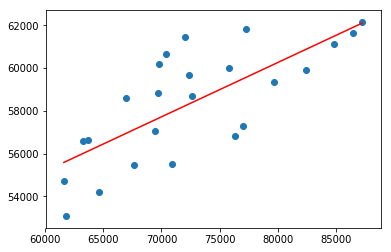

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
t = np.arange(min(men),max(men), 100)
plt.plot(t,sol.item(0)*t + sol.item(1),color='red')
plt.scatter(men,women)
plt.show()

### Algorithm 14.2: Kalman filter

In [8]:
def kalmanFilter(x,H,A,b,lbd=1.0):
    H = lbd * H + A.T.dot(A)
    d = linalg.solve(H,A.T.dot(b-A.dot(x)))
    x = x + d
    return x,H

Example 14.5, page 340. Table 14.3.

In [9]:
A1 = A[0:12,:]
b1 = b[0:12]
x = np.zeros((2,1))
H = np.zeros((2,2))
x,H = kalmanFilter(x,H,A1,b1)
print("{}\t{}".format(x.item(0),x.item(1)))
for k in range(12,24):
    x,H = kalmanFilter(x,H,A[k,:].reshape(1,2),b[k])
    print("{}\t{}".format(x.item(0),x.item(1)))


0.21075800939512573	41998.073102822156
0.23963015306480753	40074.374324535864
0.24903841146458075	39451.46648857908
0.24935508197492404	39431.5502333248
0.25509174102240634	39122.56968410651
0.25545326724564976	39157.64458026606
0.25499801776510184	39200.62732569789
0.25108663539694964	39579.67951387378
0.24500964592951335	40172.30449301707
0.2409503118980672	40617.41272731181
0.2416309305444442	40726.71916388981
0.25301161807435313	40011.71877391723
0.2534357324827362	39982.51120367221
